- Ensure you have pandas, numpy, matplotlib installed
- Perform a Did I Take My Meds database backup and make it accessible to this script
- Update the path below
- Run through all the code blocks

In [100]:
DB_PATH="/Users/mwheeler/Library/CloudStorage/Dropbox/medications/medications"

In [101]:
import sqlite3
con = sqlite3.connect(DB_PATH)
cur = con.cursor()
res = cur.execute("select name,dose_record from medication")
data = res.fetchall()
con.close()

In [102]:
import json
drugs = {}
for row in data:
    drugs[row[0]] = json.loads(row[1])

In [103]:
import pandas as pd
import numpy as np
from datetime import datetime

In [104]:
data = []
for drug in drugs:
    for dose in drugs[drug]:
        row = [datetime.fromtimestamp(dose['closestDose']/1000), (dose['doseTime'] - dose['closestDose'])/1000, drug]
        data.append(row)

In [105]:
df = pd.DataFrame(data, columns=["schedule","diff_secs","drug"])

In [106]:
df.head(2)

,schedule,diff_secs,drug
0,2023-10-09 08:00:00,-554.308,Cyproterone Acetate
1,2023-10-07 06:50:00,46.786,Cyproterone Acetate


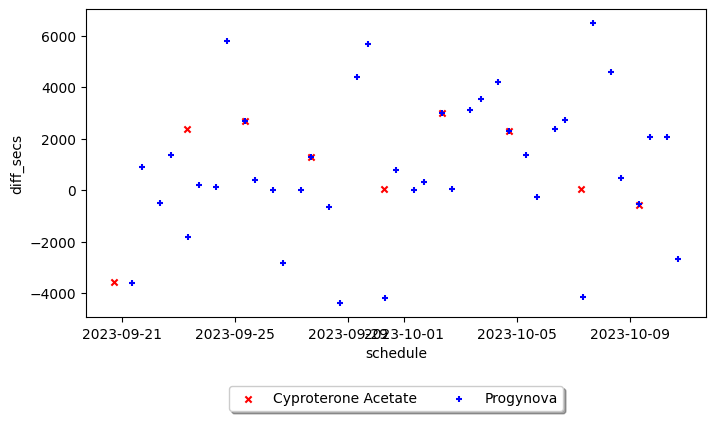

In [107]:
import matplotlib.pyplot as plt
markers = [
    {"color": "red","marker":"x"},{"color":"blue","marker":"+"},{"color":"green","marker":"o"},{"color":"orange","marker":"^"},{"color":"purple","marker":"v"},{"color":"pink","marker":"*"},
]
fig, ax = plt.subplots()
for drug in drugs:
    marker = markers[list(drugs.keys()).index(drug)]
    plot_data = df[df['drug'] == drug]
    plot_data.plot.scatter(
        x="schedule",
        y="diff_secs",
        color=marker['color'],
        marker=marker['marker'],
        ax=ax,
        figsize=[8,4]
    )
plt.legend(drugs.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=5)